In [1]:
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np

original_image = Image.open('/data/tilak/projects/sd-lora/interior_design/data/images/img_2.jpg').resize((360, 360))
image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

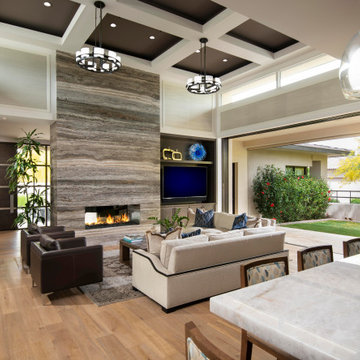

In [2]:
original_image

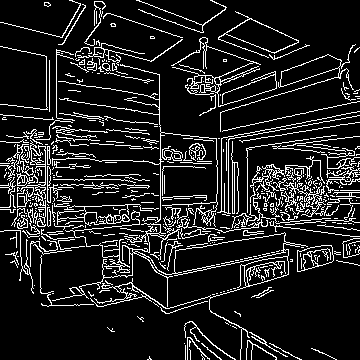

In [3]:
canny_image

In [4]:
from diffusers import StableDiffusionXLControlNetPipeline, ControlNetModel, AutoencoderKL
from diffusers.utils import load_image, make_image_grid
from PIL import Image
import cv2
import numpy as np
import torch

# original_image = load_image(
#     "https://t4.ftcdn.net/jpg/00/64/91/37/360_F_64913707_PNS2WMobSFvvUgZrr4LuXbPUmpTSlBl1.jpg"
# )

image = np.array(original_image)

low_threshold = 100
high_threshold = 200

image = cv2.Canny(image, low_threshold, high_threshold)
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)

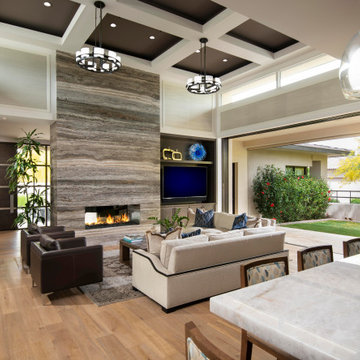

In [5]:
original_image

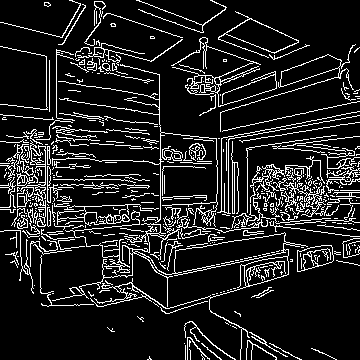

In [6]:
canny_image

In [7]:
# controlnet = ControlNetModel.from_pretrained(
#     "diffusers/controlnet-canny-sdxl-1.0",
#     torch_dtype=torch.float16,
#     use_safetensors=True
# )
# vae = AutoencoderKL.from_pretrained("madebyollin/sdxl-vae-fp16-fix", torch_dtype=torch.float16, use_safetensors=True)
# pipe = StableDiffusionXLControlNetPipeline.from_pretrained(
#     "stabilityai/stable-diffusion-xl-base-1.0",
#     controlnet=controlnet,
#     vae=vae,
#     torch_dtype=torch.float16,
#     use_safetensors=True
# )
# pipe.enable_model_cpu_offload()

In [9]:
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, UniPCMultistepScheduler
import torch

controlnet = ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny", torch_dtype=torch.float16, use_safetensors=True)
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", controlnet=controlnet, torch_dtype=torch.float16, use_safetensors=True
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
output = pipe(
    "modern White theme living room", image=canny_image
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

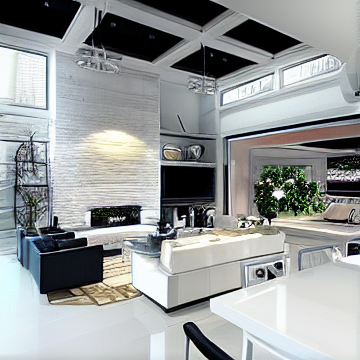

In [11]:
output

  0%|          | 0/50 [00:00<?, ?it/s]

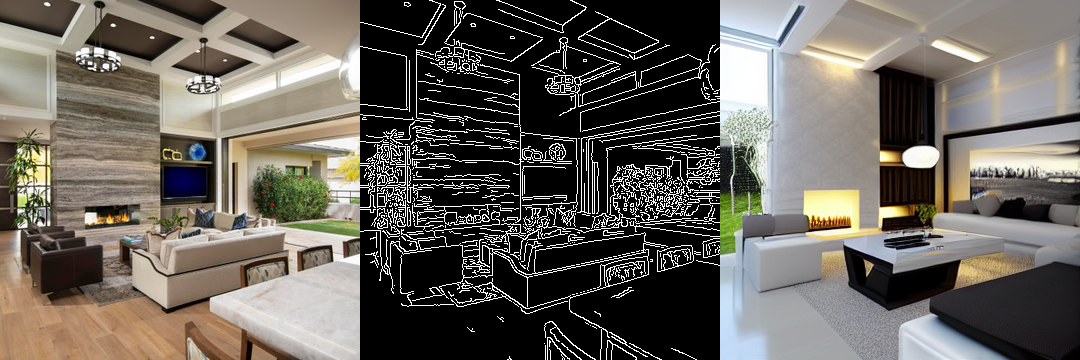

In [35]:
prompt = "modern style fully white hard wood themed living room"
negative_prompt = 'low quality, bad quality, sketches'

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    image=canny_image,
    controlnet_conditioning_scale=0.5,
).images[0]
make_image_grid([original_image, canny_image, image], rows=1, cols=3)